In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent cumputeAnaTree!


In [223]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'total CC1p',(100*float(len(GENIECC1p))/len(GENIECC1p)),'%'
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'contained',(100*float(len(GENIECC1pIsVertexContained))/len(GENIECC1p)),'%'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'tracks reconstructed',(100*float(len(GENIECC1pIsVertexReconstructed))/len(GENIECC1p)),'%'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
print len(GENIECC1p_in_FV),'tracks reconstructed and contained',(100*float(len(GENIECC1p_in_FV))/len(GENIECC1p)),'%'
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(GENIECC1p)),'%'

12976 total CC1p 100.0 %
5299 contained 40.8369297164 %
1151 tracks reconstructed 8.87022194821 %
904 tracks reconstructed and contained 6.96670776819 %
745 tracks reconstructed and contained with a separation distance below 11 cm 5.74136868064 %


In [138]:
GENIECC1pIsVertexReconstructed['corrected_reco_CC1p_Ev_fromE'] = 0.925*GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']*GENIECC1pIsVertexReconstructed['reco_CC1p_Ep'] + 0.157

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


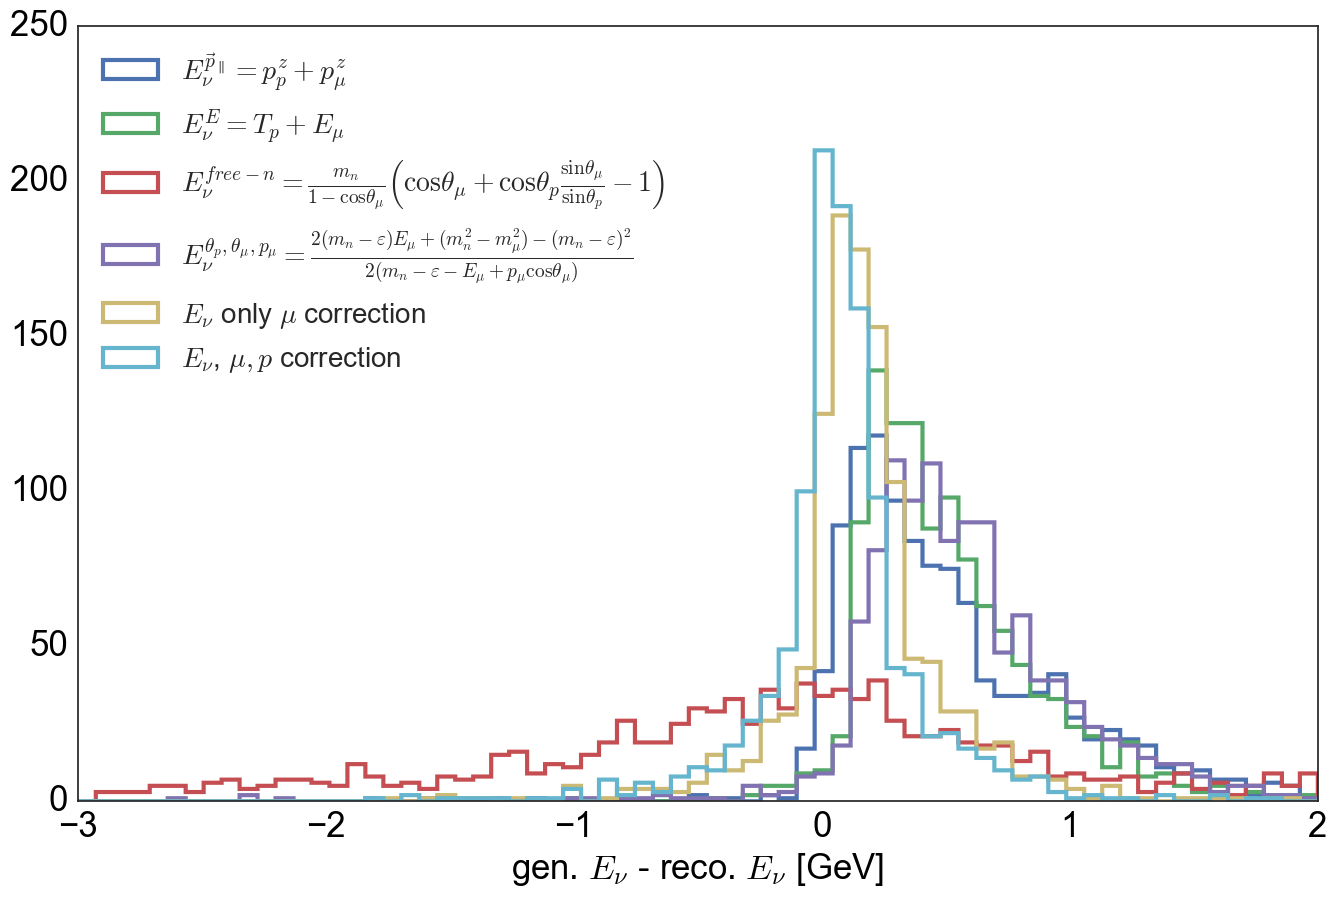

In [371]:
fig,ax = plt.subplots(figsize=(16,10))
reco_vars = ['reco_CC1p_Ev' 
             , 'reco_CC1p_Ev_fromE'
             , 'reco_CC1p_Ev_from_angles'
             , 'reco_CC1p_Ev_with_binding'
            ]
reco_labels = ['$E_{\\nu}^{\\vec{p}_\\parallel}=p_{p}^{z}+p_{\\mu}^{z}$' 
               ,'$E_{\\nu}^{E}=T_{p}+E_{\\mu}$'
               ,'$E_{\\nu}^{free-n}= \\frac{m_{n}}{1-\\cos  \\theta_{\\mu} } \\left( \\cos \\theta_{\\mu} + \\cos \\theta_{p}  \\frac{\\sin \\theta_{\\mu} }{\\sin  \\theta_{p} } - 1\\right)$' 
               ,'$E_{\\nu}^{\\theta_p,\\theta_{\\mu},p_{\\mu}}= \\frac{2(m_{n}-\\varepsilon)E_{\\mu}+(m_{n}^{2}-m_{\\mu}^{2}) -(m_{n}-\\varepsilon)^{2}}{2 (m_{n} - \\varepsilon - E_{\\mu} + p_{\\mu} \\cos \\theta_{\\mu})}$' 
              ]
bins = np.linspace(-3,2,70)
for var,label in zip(reco_vars,reco_labels):
    plt.hist( GENIECC1pIsVertexReconstructed['truth_Ev'] - GENIECC1pIsVertexReconstructed[var] , label=label, bins=bins, histtype='step' , linewidth=3)
plt.hist( sample['truth_Ev'] - sample['reco_CC1p_Ev_corrected_mu'] , label='$E_{\\nu}$ only $\\mu$ correction', bins=bins, histtype='step' , linewidth=3)
plt.hist( sample['truth_Ev'] - sample['reco_CC1p_Ev_corrected_p_mu'] , label='$E_{\\nu}$, $\\mu,p$ correction', bins=bins, histtype='step' , linewidth=3)


ax.legend(loc='upper left',fontsize=20)
set_axes(ax,'gen. $E_{\\nu}$ - reco. $E_{\\nu}$ [GeV]')

0.38097958992180714

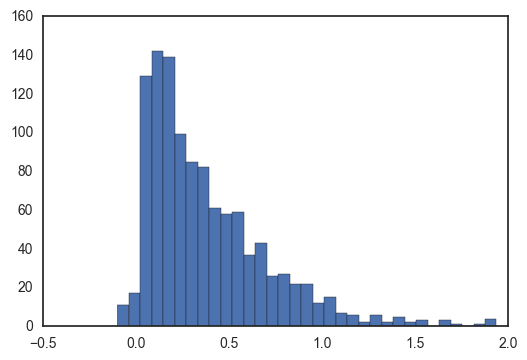

In [351]:
# print np.mean(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE'])
# fig,ax=plt.subplots(figsize=(20,6))
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE']-0.25,bins=np.linspace(-0.2,2.,100));
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Ev']-(GENIECC1pIsVertexReconstructed['truth_Ep']-0.939)-GENIECC1pIsVertexReconstructed['truth_Emu'],bins=np.linspace(-0.2,2.,100));
# np.max(GENIECC1pIsVertexReconstructed['truth_Ev']-(GENIECC1pIsVertexReconstructed['truth_Ep']-0.939)-GENIECC1pIsVertexReconstructed['truth_Emu'])
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Ep']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Ep'])-0.102,bins=35);
plt.hist(GENIECC1pIsVertexReconstructed['truth_Emu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']),bins=np.linspace(-0.1,2,35));
np.mean(GENIECC1pIsVertexReconstructed['truth_Emu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']))
# h,bins,_=plt.hist(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu']),bins=35,alpha=0.5);
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_corrected']),bins=bins,alpha=0.5);
# print np.mean(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_corrected']))

In [372]:
good_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE']-0.25)<0.2]
print len(good_sample),'good events'
bad_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE']-0.25)>0.2]
print len(bad_sample),'bad events'
sample = pd.concat([good_sample,bad_sample])
# good_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Emu']-GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']-0.25)<0.2]
# print len(good_sample),'good events'
# bad_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Emu']-GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']-0.25)>0.2]
# print len(bad_sample),'bad events'

558 good events
593 bad events



variable "plt" not defined.

variable "plt.ti" not defined.

variable "plt" not defined.

variable "plt.tig" not defined.

variable "pd" not defined.

variable "pd.conc" not defined.


# Correction using p(mu) / theta(mu) correlation

In [ ]:
from scipy.optimize import curve_fit
varx,vary = 'Pmu_theta','Pmu'
fig = plt.figure(figsize=(18,8))

def exp_func(x, a, b, c):
    '''Exponential 3-param function.'''
    return a/np.sqrt(b * x) + c


# -- -- --- - -- - -- - - -- - -- - -- - -- - -- - - -- -- - -- -- -- -- -- - - -- -
# good sample
ax = fig.add_subplot(2,3,1)
x,y = good_sample['truth_'+varx],good_sample['truth_'+vary]
ax.scatter(x,y,color='blue')
set_axes(ax,'truth $\\theta_{\\mu}$ [deg.]','truth $p_{\\mu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.2)
popt, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt), '--', c='black')

ax = fig.add_subplot(2,3,2)
x,y = good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary]
ax.scatter(x,y,color='blue')
popt_reco, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
good_sample['reco_CC1p_'+vary+'_corrected'] = good_sample['reco_CC1p_'+vary] + (exp_func(good_sample['reco_CC1p_'+varx], *popt) - exp_func(good_sample['reco_CC1p_'+varx], *popt_reco))

ax.scatter(good_sample['reco_CC1p_'+varx],good_sample['truth_'+vary],color='green',alpha=0.3)
ax.scatter(good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
set_axes(ax,'rec. $\\theta_{\\mu}$ [deg.]','rec. $p_{\\mu}$ [GeV/c]')
plt.plot(x, exp_func(x, *popt), '--', c='black')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.4)

ax = fig.add_subplot(2,3,3)
h,bins,_=ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary],bins=25,label='reconstructed');
ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
set_axes(ax,'gen. $p_{\\mu}$ - rec. $p_{\\mu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.legend(fontsize=20)

# -- -- --- - -- - -- - - -- - -- - -- - -- - -- - - -- -- - -- -- -- -- -- - - -- -
# bad sample
ax = fig.add_subplot(2,3,4)
x,y = bad_sample['truth_'+varx],bad_sample['truth_'+vary]
ax.scatter(x,y,color='red')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.2)
set_axes(ax,'truth $\\theta_{\\mu}$ [deg.]','truth $p_{\\mu}$ [GeV/c]')

popt, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt), '--', c='black')


ax = fig.add_subplot(2,3,5)
x,y = bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary]
ax.scatter(x,y,color='red')
popt_reco, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
bad_sample['reco_CC1p_'+vary+'_corrected'] = bad_sample['reco_CC1p_'+vary] + (exp_func(bad_sample['reco_CC1p_'+varx], *popt) - exp_func(bad_sample['reco_CC1p_'+varx], *popt_reco))


ax.scatter(bad_sample['reco_CC1p_'+varx],bad_sample['truth_'+vary],color='green',alpha=0.3)
ax.scatter(bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
set_axes(ax,'rec. $\\theta_{\\mu}$ [deg.]','rec. $p_{\\mu}$ [GeV/c]')
plt.plot(x, exp_func(x, *popt), '--', c='black')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.4)

ax = fig.add_subplot(2,3,6)
h,bins,_=ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary],bins=np.linspace(-2,2,35),label='reconstructed',color='red');
ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
set_axes(ax,'gen. $p_{\\mu}$ - rec. $p_{\\mu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
plt.tight_layout()

In [480]:
def correct_momentum(sample=None,varx='Pmu_theta',vary='Pmu'
                     ,x_label='$\\theta_{\\mu}$ [deg.]',y_label='$p_{\\mu}$ [GeV/c]'
                     ,xlim_diff=(-1,2.1)):
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_subplot(1,3,1)
    x,y = sample['truth_'+varx],sample['truth_'+vary]
    ax.scatter(x,y,color='blue')
    set_axes(ax,'truth '+x_label,'truth '+y_label)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.set_ylim(-0.1,1.4)
    popt, pcov = curve_fit(exp_func, x, y)
    x = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(x, exp_func(x, *popt), '--', c='black')

    ax = fig.add_subplot(1,3,2)
    x,y = sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary]
    ax.scatter(x,y,color='blue')
    popt_reco, pcov = curve_fit(exp_func, x, y)
    x = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
    for i,row in sample.iterrows():
        sample.set_value(i,'reco_CC1p_'+vary+'_corrected' , 
                         sample.get_value(i,'reco_CC1p_'+vary) + np.max([exp_func(sample.get_value(i,'reco_CC1p_'+varx), *popt)
                                                                         - exp_func(sample.get_value(i,'reco_CC1p_'+varx), *popt_reco)
#                                                                         ,exp_func(np.pi/2-sample.get_value(i,'reco_CC1p_'+varx), *popt)
#                                                                          - exp_func(np.pi/2-sample.get_value(i,'reco_CC1p_'+varx), *popt_reco)
                                                                        ]))
        
    ax.scatter(sample['reco_CC1p_'+varx],sample['truth_'+vary],color='green',alpha=0.3)
    ax.scatter(sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
    set_axes(ax,'rec. '+x_label,'rec. '+y_label)
    plt.plot(x, exp_func(x, *popt), '--', c='black')
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.set_ylim(-0.1,1.4)

    ax = fig.add_subplot(1,3,3)
    ax.set_xlim(xlim_diff)
    h,bins,_=ax.hist(sample['truth_'+vary]-sample['reco_CC1p_'+vary],bins=np.linspace(-1,2.1,50),label='reco.');
    ax.hist(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
    set_axes(ax,'gen. - rec. '+y_label)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.legend(loc='upper right',fontsize=15)
    plt.tight_layout()

891 theta(mu)<pi/2
239 theta(mu)>pi/2


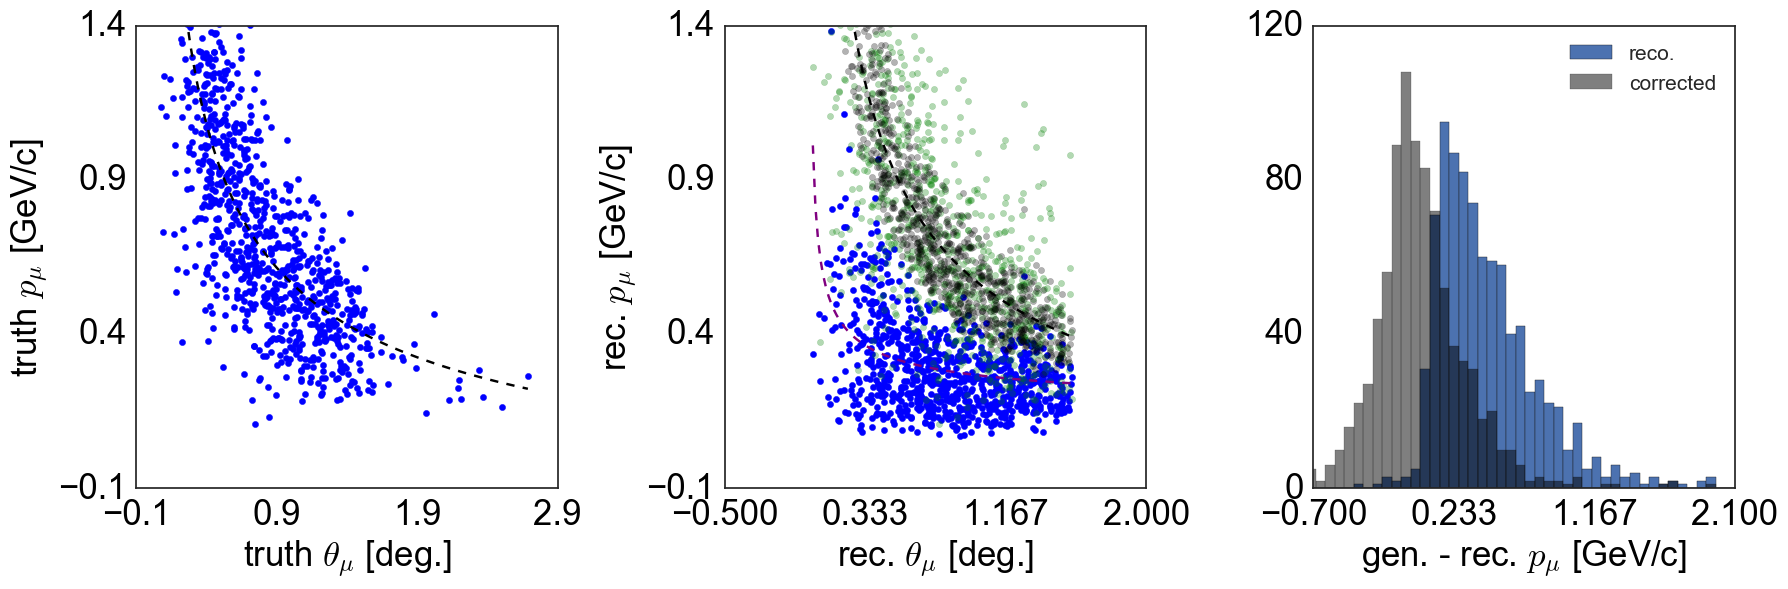

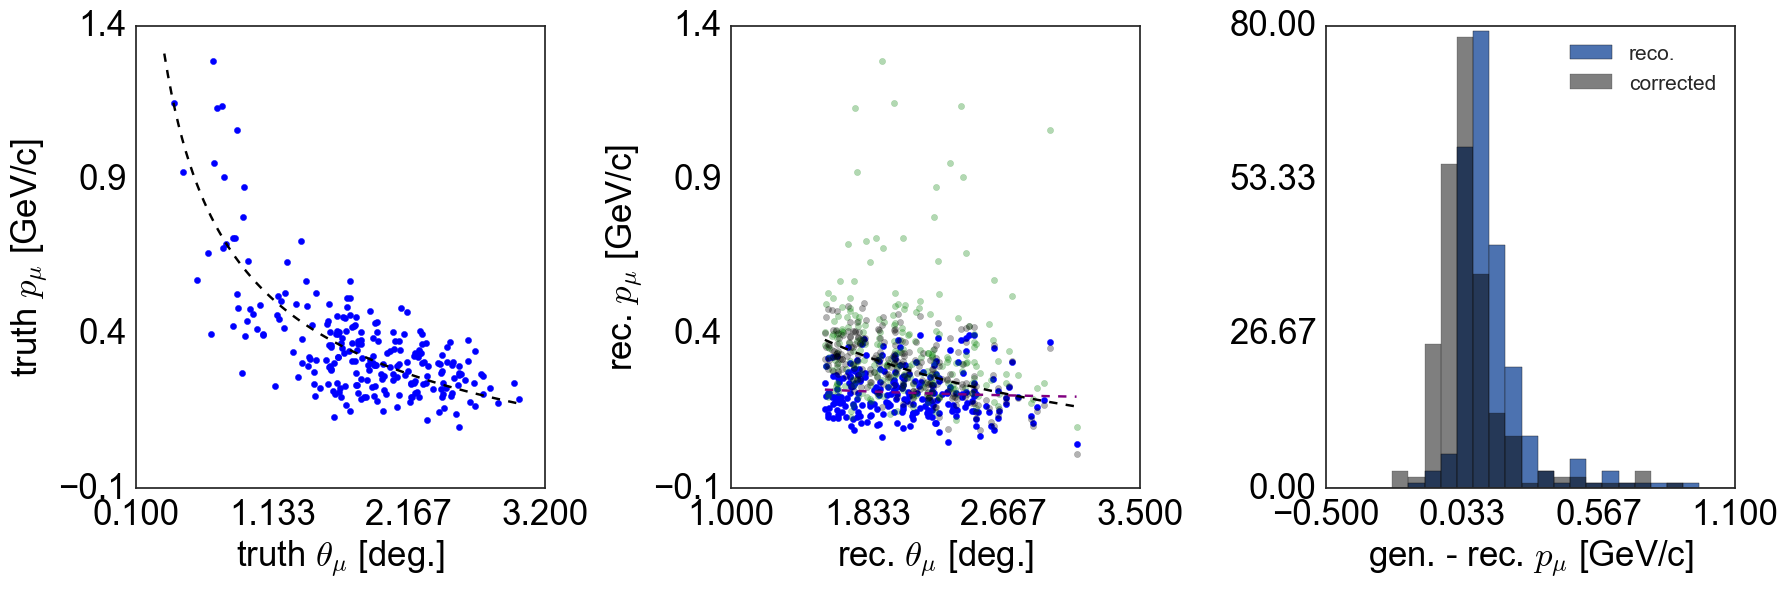

In [481]:
low_theta_mu_sample = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']<np.pi/2]
print len(low_theta_mu_sample),'theta(mu)<pi/2'
high_theta_mu_low_Pmu_sample = GENIECC1pIsVertexReconstructed[(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']>=np.pi/2)
                                                             &(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu']<=0.4)]
print len(high_theta_mu_low_Pmu_sample),'theta(mu)>pi/2'

correct_momentum(sample=low_theta_mu_sample,varx='Pmu_theta',vary='Pmu'
                 ,x_label='$\\theta_{\\mu}$ [deg.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

correct_momentum(sample=high_theta_mu_low_Pmu_sample,varx='Pmu_theta',vary='Pmu'
                 ,x_label='$\\theta_{\\mu}$ [deg.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.5,1.1))

Pp_corrected = Pp+ (0.623295/sqrt(9.992560 * Pp_theta) + 0.451352) - (0.236163/sqrt(19.029820 * Pp_theta) + 0.465819)
0.175856253692 0.0144576278296
0.209786946272 0.203942212466


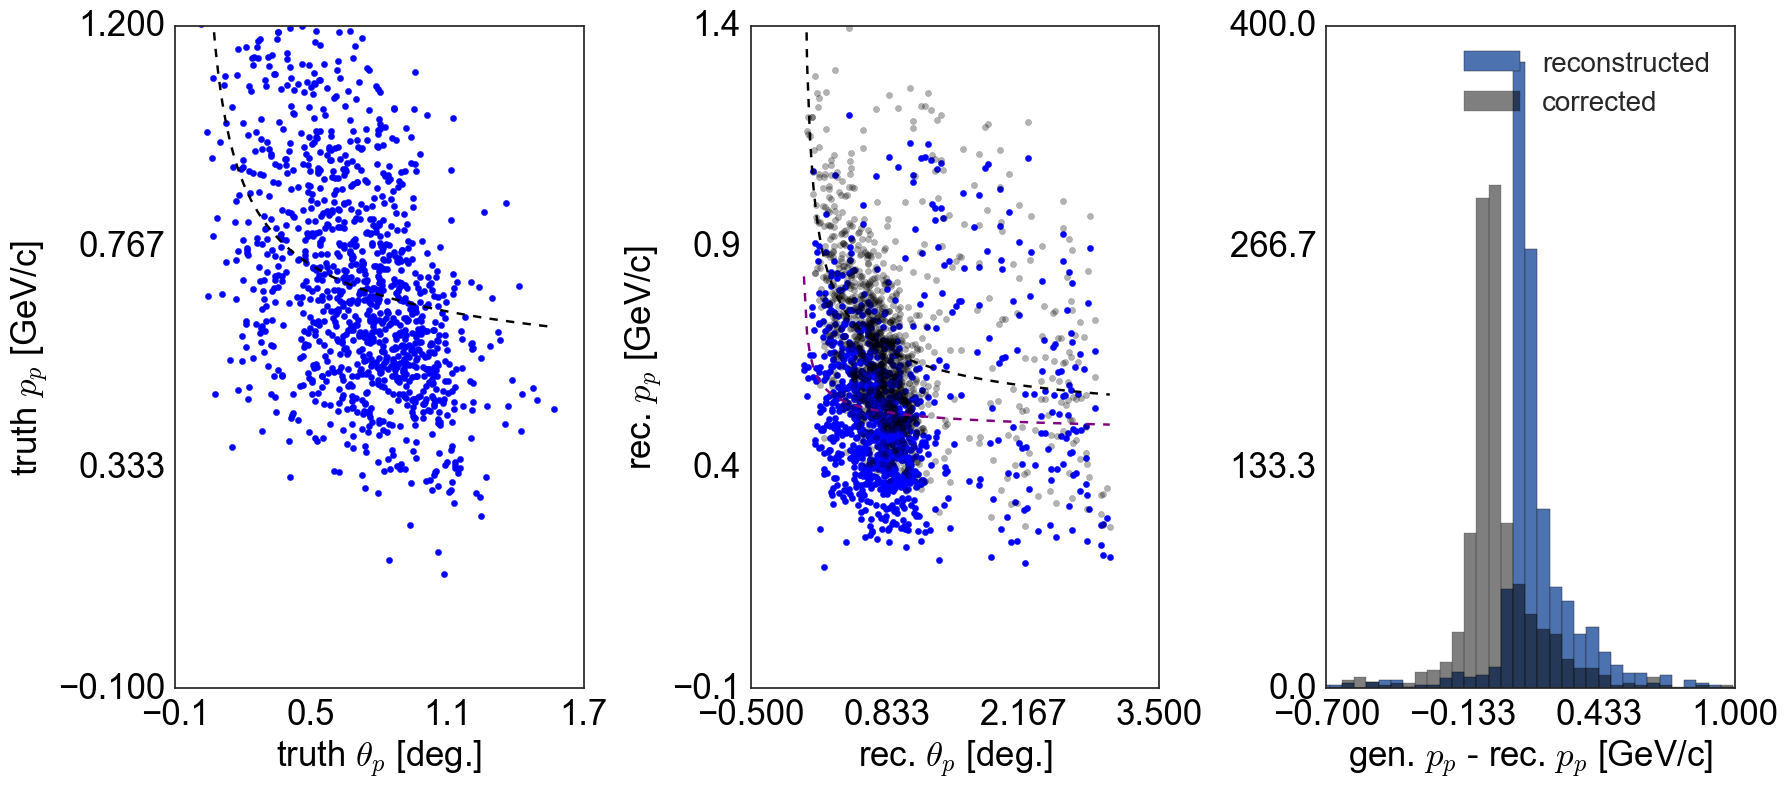

In [404]:
from scipy.optimize import curve_fit
varx,vary = 'Pp_theta','Pp'
fig = plt.figure(figsize=(18,8))

# # -- - - - -- - -- - -- - -- -- - -- -
# # good sample
# ax = fig.add_subplot(2,3,1)
# x,y = good_sample['truth_'+varx],good_sample['truth_'+vary]
# ax.scatter(x,y,color='blue')
# set_axes(ax,'truth $\\theta_{p}$ [deg.]','truth $p_{p}$ [GeV/c]')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.2)
# popt, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt), '--', c='black')

# ax = fig.add_subplot(2,3,2)
# x,y = good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary]
# ax.scatter(x,y,color='blue')
# popt_reco, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
# good_sample['reco_CC1p_'+vary+'_corrected'] = good_sample['reco_CC1p_'+vary] + (exp_func(good_sample['reco_CC1p_'+varx], *popt) - exp_func(good_sample['reco_CC1p_'+varx], *popt_reco))

# ax.scatter(good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
# set_axes(ax,'rec. $\\theta_{p}$ [deg.]','rec. $p_{p}$ [GeV/c]')
# plt.plot(x, exp_func(x, *popt), '--', c='black')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.4)

# ax = fig.add_subplot(2,3,3)
# h,bins,_=ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary],bins=25,label='reconstructed');
# ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
# set_axes(ax,'gen. $p_{p}$ - rec. $p_{p}$ [GeV/c]')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.legend(fontsize=20)

# # -- -- --- - -- - -- - - -- - -- - -- - -- - -- - - -- -- - -- -- -- -- -- - - -- -
# # bad sample
# ax = fig.add_subplot(2,3,4)
# x,y = bad_sample['truth_'+varx],bad_sample['truth_'+vary]
# ax.scatter(x,y,color='red')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.2)
# set_axes(ax,'truth $\\theta_{p}$ [deg.]','truth $p_{p}$ [GeV/c]')

# popt, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt), '--', c='black')


# ax = fig.add_subplot(2,3,5)
# x,y = bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary]
# ax.scatter(x,y,color='red')
# popt_reco, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
# bad_sample['reco_CC1p_'+vary+'_corrected'] = bad_sample['reco_CC1p_'+vary] + (exp_func(bad_sample['reco_CC1p_'+varx], *popt) - exp_func(bad_sample['reco_CC1p_'+varx], *popt_reco))

# ax.scatter(bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
# set_axes(ax,'rec. $\\theta_{p}$ [deg.]','rec. $p_{p}$ [GeV/c]')
# plt.plot(x, exp_func(x, *popt), '--', c='black')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.2)

# ax = fig.add_subplot(2,3,6)
# h,bins,_=ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary],bins=np.linspace(-2,2,35),label='reconstructed',color='red');
# ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
# set_axes(ax,'gen. $p_{p}$ - rec. $p_{p}$ [GeV/c]')
# # ax.legend(fontsize=20,loc='best')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# plt.tight_layout()




# --- - - --- -- -- --
# the two samples together, since in data we can not separate between them
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,3,1)
x,y = sample['truth_'+varx],sample['truth_'+vary]
ax.scatter(x,y,color='blue')
set_axes(ax,'truth $\\theta_{p}$ [deg.]','truth $p_{p}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.2)
popt, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt), '--', c='black')

ax = fig.add_subplot(1,3,2)
x,y = sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary]
ax.scatter(x,y,color='blue')
popt_reco, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
for i,row in sample.iterrows():
    if row['reco_CC1p_'+varx]<1.6:
        row['reco_CC1p_'+vary+'_corrected'] = row['reco_CC1p_'+vary] + (exp_func(row['reco_CC1p_'+varx], *popt) - exp_func(row['reco_CC1p_'+varx], *popt_reco))
    else:
        row['reco_CC1p_'+vary+'_corrected'] = row['reco_CC1p_'+vary]
sample['reco_CC1p_'+vary+'_corrected'] = sample['reco_CC1p_'+vary]  + ((exp_func(sample['reco_CC1p_'+varx], *popt) 
                                                                        - exp_func(sample['reco_CC1p_'+varx], *popt_reco)))
print vary+"_corrected = "+vary + "+ (%f/sqrt(%f * %s) + %f)"%(popt[0],popt[1],varx,popt[2])  + " - (%f/sqrt(%f * %s) + %f)"%(popt_reco[0],popt_reco[1],varx,popt_reco[2])


ax.scatter(sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
set_axes(ax,'rec. $\\theta_{p}$ [deg.]','rec. $p_{p}$ [GeV/c]')
plt.plot(x, exp_func(x, *popt), '--', c='black')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.4)

ax = fig.add_subplot(1,3,3)
h,bins,_=ax.hist(sample['truth_'+vary]-sample['reco_CC1p_'+vary],bins=np.linspace(-1.5,1.5,60),label='reconstructed');
ax.hist(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
set_axes(ax,'gen. $p_{p}$ - rec. $p_{p}$ [GeV/c]')
ax.set_xlim(-0.7,1)
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.legend(fontsize=20)
plt.tight_layout()
print np.mean(sample['truth_'+vary]-sample['reco_CC1p_'+vary]),np.mean(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'])
print np.std(sample['truth_'+vary]-sample['reco_CC1p_'+vary]),np.std(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'])

In [398]:
sample = pd.concat([good_sample,bad_sample])
sample['reco_CC1p_Emu_corrected'] = np.sqrt( np.square(sample['reco_CC1p_Pmu_corrected']) + 0.106*0.106 )
sample['reco_CC1p_Ev_corrected_mu'] = sample['reco_CC1p_Ep'] - 0.938 + sample['reco_CC1p_Emu_corrected']
sample['reco_CC1p_Ep_corrected'] = np.sqrt( np.square(sample['reco_CC1p_Pp_corrected']) + 0.938*0.938 )
sample['reco_CC1p_Ev_corrected_p_mu'] = sample['reco_CC1p_Ep_corrected'] - 0.938 + sample['reco_CC1p_Emu_corrected']

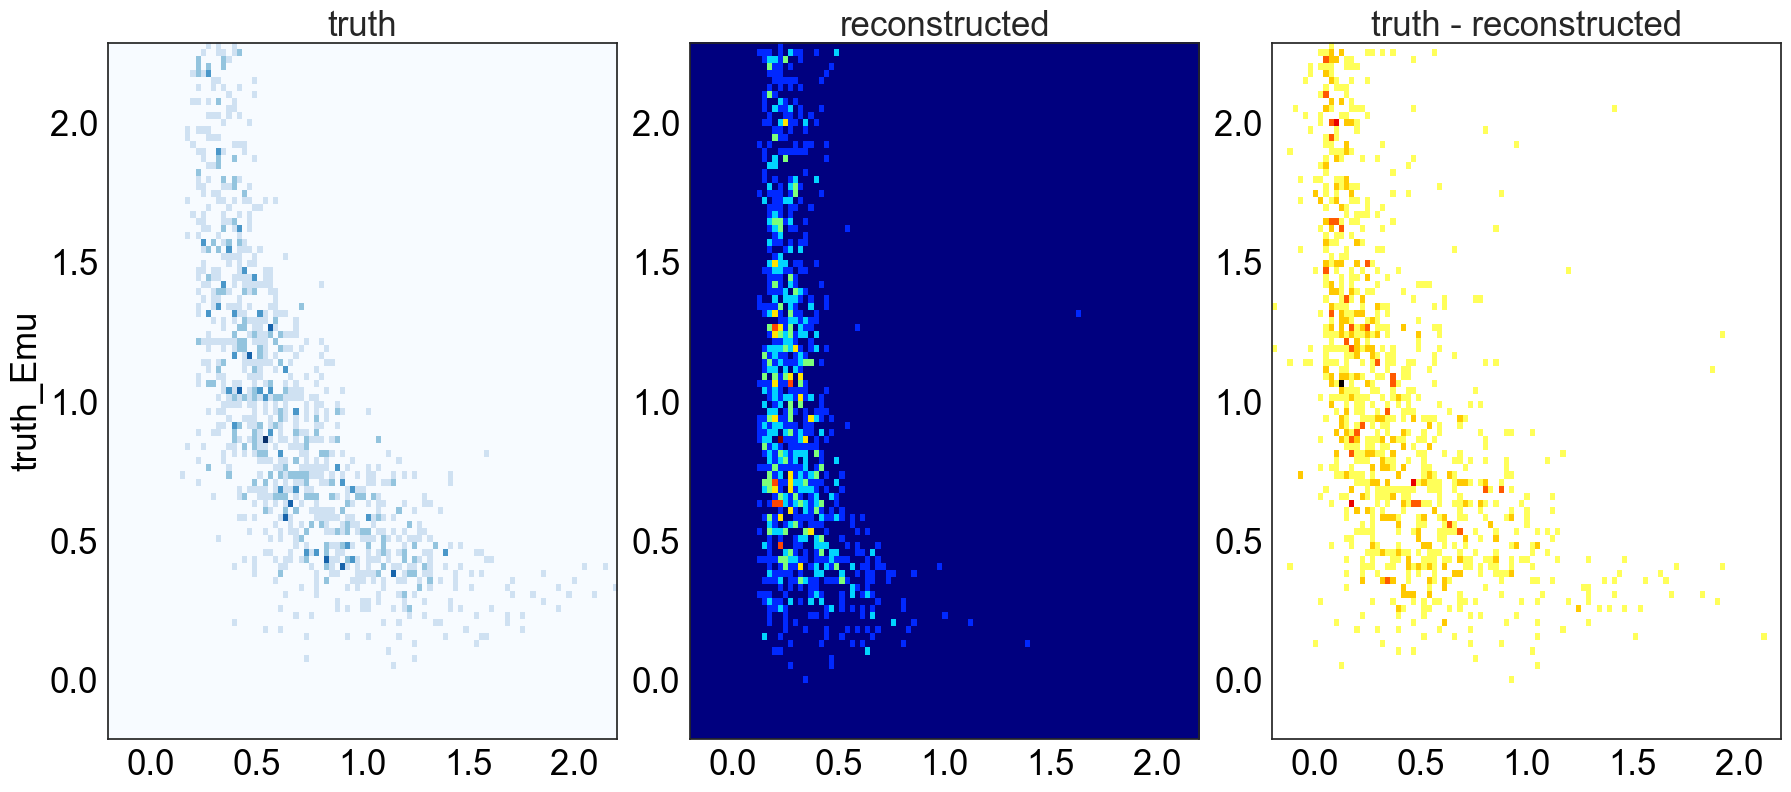

In [162]:
x_corr_var = GENIECC1pIsVertexReconstructed['truth_Pmu_theta']
x_reco_corr_var = GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']
bins=(np.linspace(-0.2,2.2,100),np.linspace(-0.2,2.3,100))

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,3,1)
ax.set_title('truth',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Emu'],x_corr_var,
             bins=bins,ax=ax,cmap='Blues')
set_axes(ax,'',corr_var)
ax = fig.add_subplot(1,3,2)
ax.set_title('reconstructed',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['reco_CC1p_Emu'],x_reco_corr_var,
             bins=bins,ax=ax,cmap='jet')
ax = fig.add_subplot(1,3,3)
ax.set_title('truth - reconstructed',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Emu']-GENIECC1pIsVertexReconstructed['reco_CC1p_Emu'],            
             x_reco_corr_var,
             bins=bins,ax=ax)
plt.tight_layout()

$E_{\mu}$=1.000 $E_{\nu}$ + -0.200


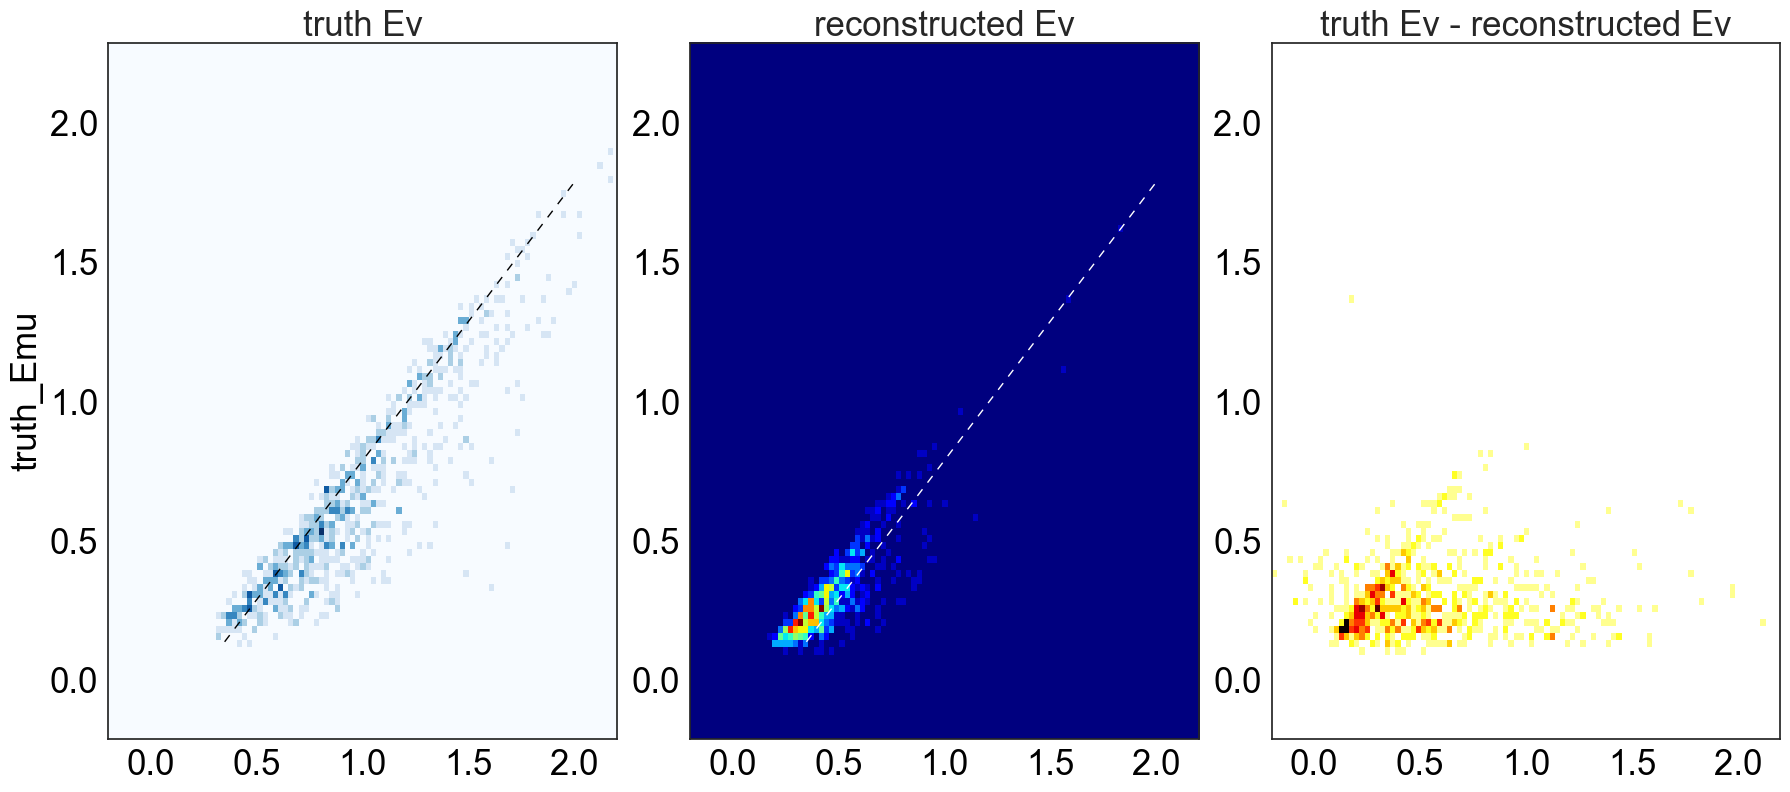

In [115]:
x_corr_var = GENIECC1pIsVertexReconstructed['truth_Emu']
x_reco_corr_var = GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']
bins=(np.linspace(-0.2,2.2,100),np.linspace(-0.2,2.3,100))

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,3,1)
ax.set_title('truth Ev',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Ev'],x_corr_var,
             bins=bins,ax=ax,cmap='Blues')
set_axes(ax,'',corr_var)
x_array,y_array=[0.35,2.],[0.15,1.8]
plt.plot(x_array,y_array,'--',color='black',linewidth=1)
slope,intercept = find_a_straight_line(x_array,y_array)
print "$E_{\\mu}$=%.3f $E_{\\nu}$ + %.3f"%(slope,intercept)
ax = fig.add_subplot(1,3,2)
ax.set_title('reconstructed Ev',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE'],x_reco_corr_var,
             bins=bins,ax=ax,cmap='jet')
x_array,y_array=[0.35,2.],[0.15,1.8]
plt.plot(x_array,y_array,'--',color='white',linewidth=1)
ax = fig.add_subplot(1,3,3)
ax.set_title('truth Ev - reconstructed Ev',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE'],            
             x_reco_corr_var,
             bins=bins,ax=ax)
# plt.plot([0.,0.0],[0.3,1.3],'--',color='black',linewidth=1)
plt.tight_layout()

Ev=0.925 $E_{\mu}*E_p$ + 0.157


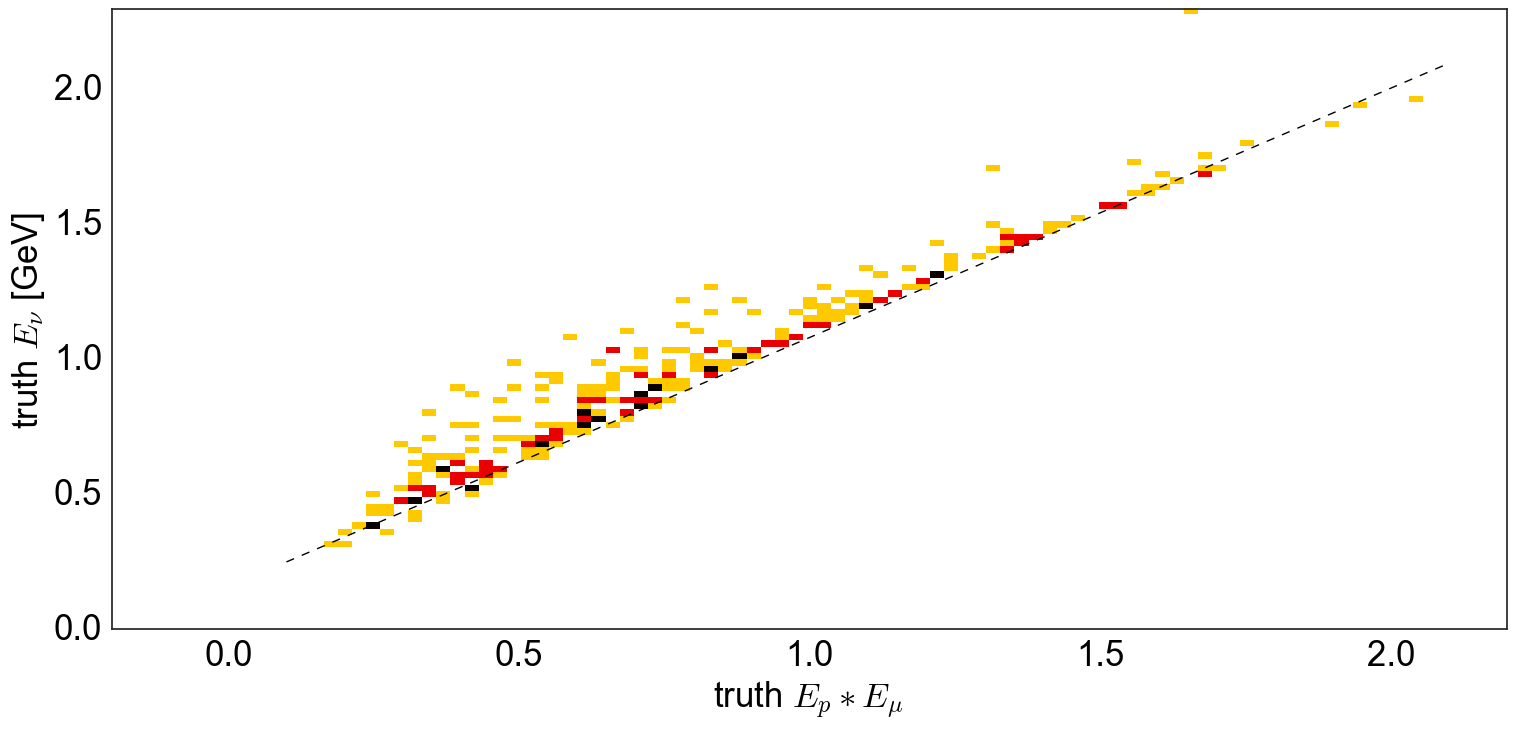

In [103]:
fig,ax = plt.subplots(figsize=(18,8))
plot_2d_hist( GENIECC1pIsVertexReconstructed.truth_Emu*GENIECC1pIsVertexReconstructed.truth_Ep,
             GENIECC1pIsVertexReconstructed['truth_Ev'],             
             bins=(np.linspace(-0.2,2.2,100),np.linspace(0,2.3,100)),ax=ax)
set_axes(ax,'truth $E_{p} * E_{\\mu}$ ','truth $E_{\\nu}$ [GeV]')
x_array,y_array=[0.1,2.1],[0.25,2.1]
plt.plot(x_array,y_array,'--',color='black',linewidth=1)
slope,intercept = find_a_straight_line(x_array,y_array)
print "Ev=%.3f $E_{\\mu}*E_p$ + %.3f"%(slope,intercept)